# **TSF-GRIP DECEMBER-**22


## **Task 1= Prediction using Supervised ML**

### **Author: Trupti S. Mahabale**

### **Predict the percentage of an student based on the no. of study hours.**

**Import Python Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn

In [3]:
website = 'http://bit.ly/w-data'
data = pd.read_csv(website)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Visualize the Data**

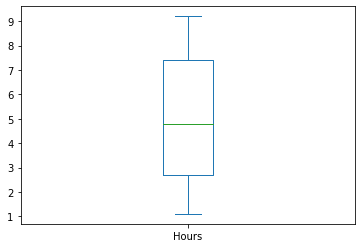

In [8]:

# creating if there is any outliers in the data set or not
data['Hours'].plot.box()

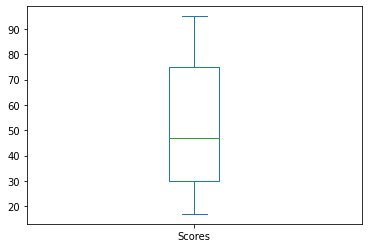

In [9]:
data['Scores'].plot.box()

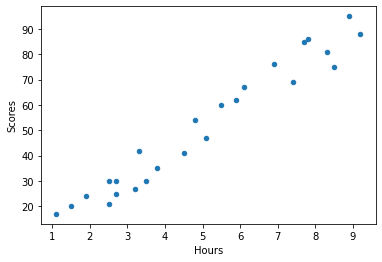

In [10]:
# plotting the data into scatter plot to see the relationship
data.plot(kind = 'scatter', x= 'Hours' , y = 'Scores')

In [11]:
# let's check the relationship with correlation matrix

data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [12]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Linear Regreesion**

In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [29]:
# Ṣplitting the dataset into testing and training

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)



In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

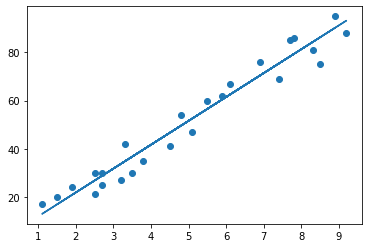

In [31]:
m = reg.coef_
c = reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

**Visualizing the model**

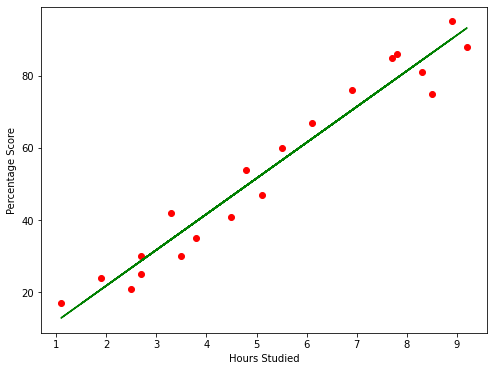

In [32]:
plt.rcParams['figure.figsize']=[8,6]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color = 'green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [33]:
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
y_test

array([20, 27, 69, 30, 62])

In [35]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**What will be the precited score if a student studied 9.25 Hours/Day?**

In [39]:
new_hours = 9.25
new_pred = reg.predict([[new_hours]])
print('Predicted Score = {}'.format(new_pred[0]))


Predicted Score = 93.69173248737539


**Model Evaluation**

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:' ,metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score' , r2_score(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
R2 Score 0.9454906892105354
